In [10]:
# Library
import pandas as pd

## Data cleaning and merging

### Cleaning of mesh blocks and postal area data

In [11]:
# Mesh Blocks

# Read data
mb_df = pd.read_csv('../../data/raw/external/population_income/MB_2021.csv', encoding='ISO-8859-1')
# Data cleaning
mb_df = mb_df[mb_df.iloc[:, 13] == 2] # retain victoria data
mb_df = mb_df.iloc[:, [0, 5, 13, 14]]
mb_df_unique = mb_df[['SA2_CODE_2021', 'MB_CODE_2021']].drop_duplicates(subset='SA2_CODE_2021')

# Postal Area

# Read data
poa_df = pd.read_csv('../../data/raw/external/population_income/POA_2021.csv', encoding='ISO-8859-1')

/var/folders/k7/_mb_sxqs3kq79v5w1cmsbshm0000gn/T/ipykernel_87858/2005800791.py:4: DtypeWarning: Columns (0,4,5,7,9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  mb_df = pd.read_csv('../../data/raw/external/population_income/MB_2021.csv', encoding='ISO-8859-1')
/var/folders/k7/_mb_sxqs3kq79v5w1cmsbshm0000gn/T/ipykernel_87858/2005800791.py:13: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  poa_df = pd.read_csv('../../data/raw/external/population_income/POA_2021.csv', encoding='ISO-8859-1')


### Cleaning and merging income data

#### 2016-2020

In [12]:
# 2016-2020

# Read data
income_16_20_df = pd.read_csv('../../data/raw/external/population_income/income_2016-20.csv', encoding='ISO-8859-1')

# Data cleaning
income_16_20_df = income_16_20_df.iloc[651:1173] # retain victoria data
# remove unused data
income_16_20_df = income_16_20_df.drop(income_16_20_df.columns[2:22], axis=1) # retain mean income
income_16_20_df = income_16_20_df.drop(income_16_20_df.columns[7:], axis=1)
# add column name
income_16_20_df.columns = ['SA2 code', 'SA2 name', '2016', '2017','2018','2019','2020']
# change numbers to integers
income_16_20_df['SA2 code'] = income_16_20_df['SA2 code'].astype(int)

# Merge MB code
income_16_20_df = income_16_20_df.merge(mb_df_unique[['SA2_CODE_2021', 'MB_CODE_2021']], 
                                    left_on='SA2 code', right_on='SA2_CODE_2021', how='left')

income_16_20_df.rename(columns={'MB_CODE_2021': 'MB code'}, inplace=True)
income_16_20_df.drop(columns=['SA2_CODE_2021'], inplace=True)

# Merge Postcode
income_16_20_df = income_16_20_df.merge(poa_df[['POA_CODE_2021', 'MB_CODE_2021']], 
                                    left_on='MB code', right_on='MB_CODE_2021', how='left')
income_16_20_df.rename(columns={'POA_CODE_2021': 'Postcode'}, inplace=True)
income_16_20_df.drop(columns=['MB_CODE_2021'], inplace=True)

In [13]:
# SA2 2016 to 2021

# Read data
sa2_16to21_df = pd.read_csv('../../data/raw/external/population_income/SA2_2016_to_2021.csv', encoding='ISO-8859-1')

# Data cleaning
sa2_16to21_df = sa2_16to21_df.iloc[0:-1]
sa2_16to21_df.rename(columns={sa2_16to21_df.columns[0]: 'SA2_CODE_2016'}, inplace=True) # make column names valid
sa2_16to21_df = sa2_16to21_df.dropna(subset=['SA2_CODE_2021'])
# change numbers to integers
sa2_16to21_df['SA2_CODE_2016'] = sa2_16to21_df['SA2_CODE_2016'].astype(int)
sa2_16to21_df['SA2_CODE_2021'] = sa2_16to21_df['SA2_CODE_2021'].astype(int)

#### 2011-2016

In [14]:
# 2011-2016

# Read data
income_11_16_df = pd.read_csv('../../data/raw/external/population_income/income_2011-16.csv', encoding='ISO-8859-1')

# Data cleaning
income_11_16_df = income_11_16_df.iloc[585:1047] # retain victoria data
# remove unused data
income_11_16_df = income_11_16_df.drop(income_11_16_df.columns[2:26], axis=1) # retain mean income
income_11_16_df = income_11_16_df.drop(income_11_16_df.columns[-1], axis=1) # remove 2016 data
# add column name
income_11_16_df.columns = ['SA2 code', 'SA2 name', '2011', '2012','2013','2014','2015']
# change numbers to integers
income_11_16_df['SA2 code'] = income_11_16_df['SA2 code'].astype(int)
# change 2016 SA2 code to 2021 SA2 code
income_11_16_df = income_11_16_df.merge(sa2_16to21_df[['SA2_CODE_2016', 'SA2_CODE_2021']], 
                                    left_on='SA2 code', right_on='SA2_CODE_2016', how='left')
income_11_16_df.drop(columns=['SA2 code'], inplace=True)

# Merge
# merge MB code
income_11_16_df = income_11_16_df.merge(mb_df_unique[['SA2_CODE_2021', 'MB_CODE_2021']], 
                                    left_on='SA2_CODE_2021', right_on='SA2_CODE_2021', how='left')
income_11_16_df.rename(columns={'MB_CODE_2021': 'MB code'}, inplace=True)
# merge Postcode
income_11_16_df = income_11_16_df.merge(poa_df[['POA_CODE_2021', 'MB_CODE_2021']], 
                                    left_on='MB code', right_on='MB_CODE_2021', how='left')
income_11_16_df.rename(columns={'POA_CODE_2021': 'Postcode'}, inplace=True)
income_11_16_df.drop(columns=['MB_CODE_2021'], inplace=True)

In [15]:
# SA2 2011 to 2016

# Read data
sa2_11to16_df = pd.read_csv('../../data/raw/external/population_income/SA2_2011_to_2016.csv', encoding='ISO-8859-1')

# Data cleaning
sa2_11to16_df = sa2_11to16_df.iloc[6:-3]
sa2_11to16_df = sa2_11to16_df.iloc[:, [0, 1, 2, 3]]
sa2_11to16_df.columns = ['SA2_CODE_2011', 'SA2_NAME_2011', 'SA2_CODE_2016', 'SA2_NAME_2016']
# change numbers to integers
sa2_11to16_df['SA2_CODE_2011'] = sa2_11to16_df['SA2_CODE_2011'].astype(int)
sa2_11to16_df['SA2_CODE_2016'] = sa2_11to16_df['SA2_CODE_2016'].astype(int)


#### 2005-2010

In [17]:
# 2005-2010

# Read data
income_05_10_df = pd.read_csv('../../data/raw/external/population_income/income_2005-10.csv', encoding='ISO-8859-1')

# Data cleaning
income_05_10_df = income_05_10_df.iloc[542:970] # retain victoria data
# remove unused data
income_05_10_df = income_05_10_df.drop(income_05_10_df.columns[2:104], axis=1)
# add column name
income_05_10_df.columns = ['SA2 code', 'SA2 name', '2005', '2006','2007','2008','2009', '2010']
# change numbers to integers
income_05_10_df['SA2 code'] = income_05_10_df['SA2 code'].astype(int)

# Change code from 2011 to 2021
# change 2011 SA2 code to 2016 SA2 code
income_05_10_df = income_05_10_df.merge(sa2_11to16_df[['SA2_CODE_2011', 'SA2_CODE_2016']], 
                                    left_on='SA2 code', right_on='SA2_CODE_2011', how='left')
income_05_10_df.drop(columns=['SA2 code'], inplace=True)
# change 2016 SA2 code to 2021 SA2 code
income_05_10_df = income_05_10_df.merge(sa2_16to21_df[['SA2_CODE_2016', 'SA2_CODE_2021']], 
                                    left_on='SA2_CODE_2016', right_on='SA2_CODE_2016', how='left')

# Merge
# merge MB code
income_05_10_df = income_05_10_df.merge(mb_df_unique[['SA2_CODE_2021', 'MB_CODE_2021']], 
                                    left_on='SA2_CODE_2021', right_on='SA2_CODE_2021', how='left')
income_05_10_df.rename(columns={'MB_CODE_2021': 'MB code'}, inplace=True)
#income_05_10_df.drop(columns=['SA2_CODE_2021'], inplace=True)
# merge Postcode
income_05_10_df = income_05_10_df.merge(poa_df[['POA_CODE_2021', 'MB_CODE_2021']], 
                                    left_on='MB code', right_on='MB_CODE_2021', how='left')
income_05_10_df.rename(columns={'POA_CODE_2021': 'Postcode'}, inplace=True)
income_05_10_df.drop(columns=['MB_CODE_2021'], inplace=True)

#### Merging of all income data

In [18]:
# Combine three df
income_05_20_df = income_16_20_df.merge(income_11_16_df[['SA2_CODE_2021', '2011', '2012', '2013', '2014', '2015']], 
                                        left_on='SA2 code', right_on='SA2_CODE_2021', how='left')

income_05_20_df = income_05_20_df.merge(income_05_10_df[['SA2_CODE_2021', '2005', '2006', '2007', '2008', '2009','2010']], 
                                        left_on='SA2 code', right_on='SA2_CODE_2021', how='left')

# Data cleaning
income_05_20_df = income_05_20_df.iloc[:, [0, 1, 8, 16, 17, 18, 19, 20, 21, 10, 11, 12, 13, 14, 2, 3, 4, 5, 6]]
columns_to_convert = income_05_20_df.columns[3:]
# change data type to numeric
income_05_20_df[columns_to_convert] = (income_05_20_df[columns_to_convert].replace({',': '', '\s+': ''}, regex=True).apply(pd.to_numeric, errors='coerce').fillna(0)).astype(int)
income_05_20_df['SA2 code'] = pd.to_numeric(income_05_20_df['SA2 code'], errors='coerce').astype(int)
income_05_20_df['Postcode'] = pd.to_numeric(income_05_20_df['Postcode'], errors='coerce').astype(int)

# Combine data with same postcode
income_05_20_df = income_05_20_df.iloc[:, 2:]
income_05_20_merged_df = income_05_20_df.groupby('Postcode').sum().reset_index()

In [19]:
print(len(income_05_20_df))
print(len(income_05_20_merged_df))
income_05_20_merged_df.head()

565
329


,Postcode,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,3000,153156,160347,150282,152934,172224,169989,164214,162528,171033,159549,159876,155041,155609,159578,164117,178122
1,3002,80524,87975,79947,90831,95349,103268,107768,104960,116888,114762,122960,124543,128433,131685,135500,143914
2,3003,43585,45320,47056,50320,51960,54541,56228,57669,59378,60656,62713,173368,295834,174124,161145,132112
3,3004,54551,61427,62827,67588,64954,75522,71516,73232,74154,73998,75285,55727,0,38825,0,45072
4,3006,109102,122854,125654,135176,129908,151044,143032,146464,148308,147996,150570,152271,154359,161929,159399,158942


In [20]:
# Save data
income_05_20_merged_df.to_csv('../../data/landing/preprocessed_income_2005-20.csv', index=False)

## Data forecasting

#### Visualize original data

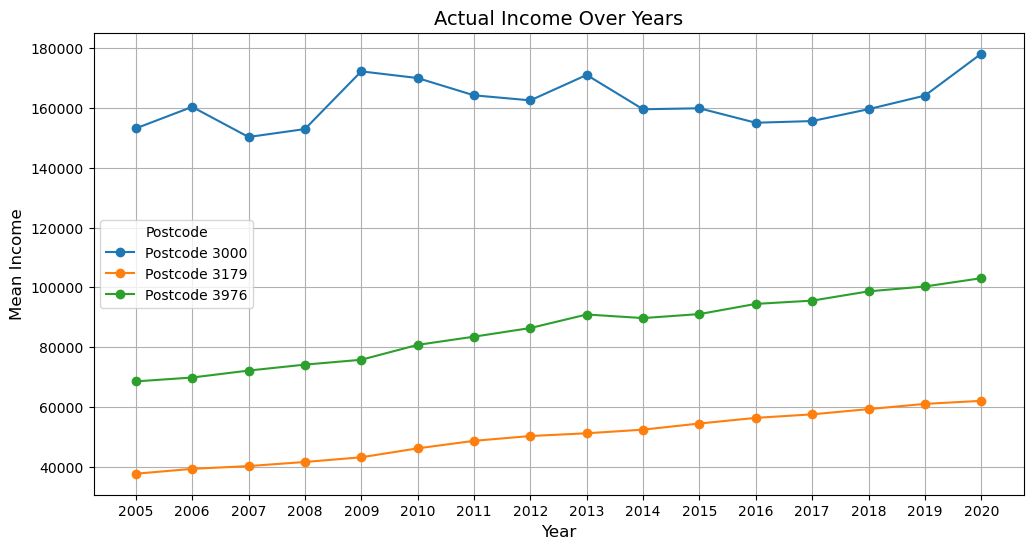

In [21]:
# Visualize income
import matplotlib.pyplot as plt

# read data
preprocessed_income_df = pd.read_csv('../../data/landing/preprocessed_income_2005-20.csv', encoding='ISO-8859-1')

# plot
preprocessed_income_df = preprocessed_income_df.set_index('Postcode')
selected_rows = preprocessed_income_df.loc[[3000, 3179, 3976]]

plt.figure(figsize=(12,6))
for postcode, row_data in selected_rows.iterrows():
    plt.plot(row_data.index, row_data.values, marker='o', linestyle='-', label=f'Postcode {postcode}')

plt.title('Actual Income Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Income', fontsize=12)
plt.legend(title="Postcode")
plt.grid(True)
plt.savefig('../../plots/Actual Income Over Years.png')


#### Forecasting

In [22]:
# Predict income in 2000-2004, 2021-2025
import numpy as np
from sklearn.linear_model import LinearRegression

preprocessed_income_df['2000'] = None
preprocessed_income_df['2001'] = None
preprocessed_income_df['2002'] = None
preprocessed_income_df['2003'] = None
preprocessed_income_df['2004'] = None
preprocessed_income_df['2021'] = None
preprocessed_income_df['2022'] = None
preprocessed_income_df['2023'] = None
preprocessed_income_df['2024'] = None
preprocessed_income_df['2025'] = None
preprocessed_income_df['2026'] = None
preprocessed_income_df['2027'] = None

years = list(map(str, range(2005, 2021)))
prediction_years = list(map(str, range(2000, 2005))) + list(map(str, range(2021, 2028)))

for postcode, row_data in preprocessed_income_df.iterrows():
    # remove invalid data
    valid_years = [year for year in years if row_data[year] > 0]
    valid_incomes = row_data[valid_years].values.astype(float)
    
    if len(valid_years) > 1:
        X = pd.DataFrame(valid_years).astype(float)
        y = np.log(valid_incomes)
        
        model = LinearRegression()
        model.fit(X, y)
        
        # predict 2000-2004, 2021-2027 and invalid data
        for year in prediction_years + years:
            if row_data[year] == 0 or year in prediction_years:
                predicted_income = np.exp(model.predict([[float(year)]])[0])
                preprocessed_income_df.at[postcode, year] = round(predicted_income)

# reordering columns     
for year in reversed(['2004', '2003', '2002', '2001', '2000']):
    col_data = preprocessed_income_df.pop(year)
    preprocessed_income_df.insert(preprocessed_income_df.columns.get_loc('2005'), year, col_data)

preprocessed_income_df = preprocessed_income_df.reset_index()

In [23]:
# Save data
preprocessed_income_df.to_csv('../../data/landing/income_2000-27.csv', index=False)

#### Visualize predicted data

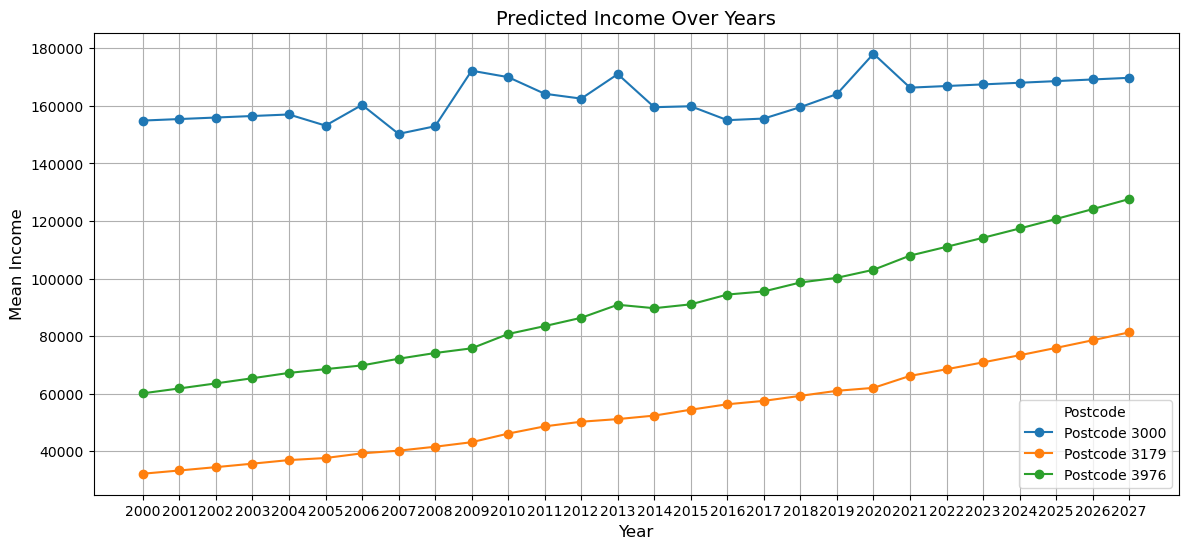

In [24]:
# plot
preprocessed_income_df = preprocessed_income_df.set_index('Postcode')
selected_rows = preprocessed_income_df.loc[[3000, 3179, 3976]]

plt.figure(figsize=(14,6))
for postcode, row_data in selected_rows.iterrows():
    plt.plot(row_data.index, row_data.values, marker='o', linestyle='-', label=f'Postcode {postcode}')

plt.title('Predicted Income Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Income', fontsize=12)
plt.legend(title="Postcode")
plt.grid(True)
plt.savefig('../../plots/Predicted Income Over Years.png')

## Evaluate prediction

### Visualize actual vs. predicted data

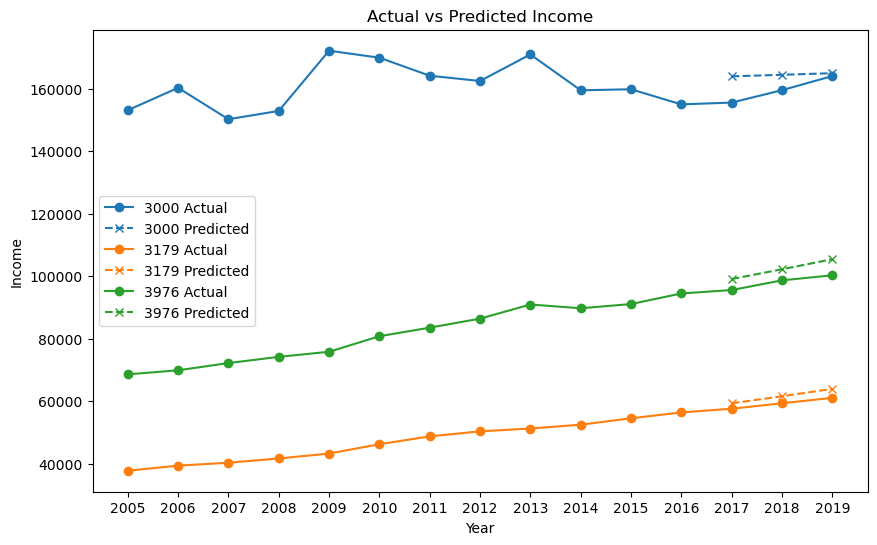

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
from itertools import cycle

# read data
preprocessed_income_df = pd.read_csv('../../data/landing/preprocessed_income_2005-20.csv', encoding='ISO-8859-1')

# store predicted value
y_pred_list = []
postcode_list = []
predicted_df = pd.DataFrame(columns=['Postcode', '2017', '2018', '2019'])
# store residuals, MSE, and R2
residuals_list = []
mse_list = []
r2_list = []

training_years = list(map(str, range(2005, 2017)))
testing_years = list(map(str, range(2017, 2020)))

for idx, row_data in preprocessed_income_df.iterrows():
    postcode = row_data.iloc[0]
    if all(year in row_data.index for year in training_years):
    
        # extract data to train and test
        X_train = pd.DataFrame(training_years)
        X_test = pd.DataFrame(testing_years)
        y_test = row_data[testing_years].values.astype(float)
        # log data
        y_train = row_data[training_years].values.astype(float)
        y_train[y_train <= 0] = 0.01
        y_train_log = np.log(y_train)
        
        # fit model
        model = LinearRegression()
        model.fit(X_train, y_train_log)

        # predict 2021-2023
        y_pred_log = model.predict(X_test)
        y_pred = np.exp(y_pred_log)

        # store predicted data
        new_row = pd.DataFrame({
            'Postcode': [postcode],
            '2017': [y_pred[0]],
            '2018': [y_pred[1]],
            '2019': [y_pred[2]]
        })
        predicted_df = pd.concat([predicted_df, new_row], ignore_index=True)

        # compute residual
        residuals = y_test - y_pred
        residuals_list.extend(residuals)
        # compute MSE
        mse = mean_squared_error(y_test, y_pred)
        mse_list.append(mse)
        # compute R2
        r2 = model.score(X_train, y_train_log)
        r2_list.append(r2)

predicted_df.set_index('Postcode', inplace=True)
preprocessed_income_df.set_index('Postcode', inplace=True)

# Visulize actual vs. predicted data
selected_postcodes = [3000, 3179, 3976]
plt.figure(figsize=(10, 6))
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

for postcode in selected_postcodes:
    # extract data
    actual_training_values = preprocessed_income_df.loc[postcode, training_years].values.astype(float)
    actual_testing_values = preprocessed_income_df.loc[postcode, testing_years].values.astype(float)
    actual_values = list(actual_training_values) + list(actual_testing_values)
    actual_years = training_years + testing_years
    predicted_values = predicted_df.loc[postcode, testing_years].values.astype(float)
    # plot
    color = next(color_cycle)
    plt.plot(actual_years, actual_values, label=f'{postcode} Actual', marker='o', color=color)
    plt.plot(testing_years, predicted_values, label=f'{postcode} Predicted', linestyle='--', marker='x', color=color)

plt.title('Actual vs Predicted Income')
plt.xlabel('Year')
plt.ylabel('Income')
plt.legend()
plt.savefig('../../plots/Actual vs Predicted Income.png')

### Residual analysis

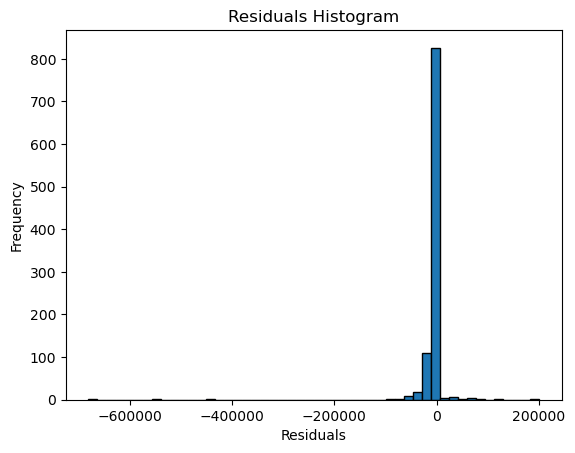

Mean Residual: -6918.052411701146
Standard Deviation of Residuals: 33527.98644853468


In [26]:
# plot residuals
residuals_df = pd.DataFrame(residuals_list, columns=['Residuals'])

plt.hist(residuals_df['Residuals'], bins=50, edgecolor='black')
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Compute mean and sd for residuals
mean_residual = residuals_df['Residuals'].mean()
std_residual = residuals_df['Residuals'].std()
print(f'Mean Residual: {mean_residual}')
print(f'Standard Deviation of Residuals: {std_residual}')

### MSE computation

In [27]:
mse_array = np.array(mse_list)
mean_mse = mse_array.mean()
std_mse = mse_array.std()
print(f'Mean MSE: {mean_mse}')
print(f'Standard Deviation of MSE: {std_mse}')

Mean MSE: 1170846392.4729903
Standard Deviation of MSE: 17580110484.373375


### R2 computation

In [28]:
r2_array = np.array(r2_list)
mean_r2 = r2_array.mean()
std_r2 = r2_array.std()
print(f'Mean R²: {mean_r2}')
print(f'Standard Deviation of R²: {std_r2}')

Mean R²: 0.9352168676416465
Standard Deviation of R²: 0.12496355569278166


### Cross Validation

In [29]:
from sklearn.model_selection import cross_val_score

cv_mse_list = []

for postcode, row_data in preprocessed_income_df.iterrows():
    if all(year in row_data.index for year in training_years):
        X = pd.DataFrame(training_years)
        y = row_data[training_years].values.astype(float)
        y[y <= 0] = 0.01
        y_log = np.log(y)
        
        model = LinearRegression()

        # compute mse by cross validation
        mse_scores = cross_val_score(model, X, y_log, cv=5, scoring='neg_mean_squared_error')
        mean_mse = -np.mean(mse_scores)
        cv_mse_list.append(mean_mse)

print(f'Average Cross-Validation MSE: {np.mean(cv_mse_list)}')

Average Cross-Validation MSE: 0.33477677416828083
